# KMeans

In [2]:
import pandas as pd
df = pd.read_csv('seeds.csv', header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
0    210 non-null float64
1    210 non-null float64
2    210 non-null float64
3    210 non-null float64
4    210 non-null float64
5    210 non-null float64
6    210 non-null float64
7    210 non-null int64
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [9]:
df.tail()

,0,1,2,3,4,5,6,7
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,3


In [6]:
samples = df.drop(7, axis=1)
samples.head()

,0,1,2,3,4,5,6
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [11]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)

labels = model.fit_predict(samples)

df_2 = pd.DataFrame({'labels': labels, 'varieties': df.iloc[:,7]})

ct = pd.crosstab(df_2['labels'],df_2['varieties'])

print(ct)

varieties   1   2   3
labels               
0           9   0  68
1           1  60   0
2          60  10   2


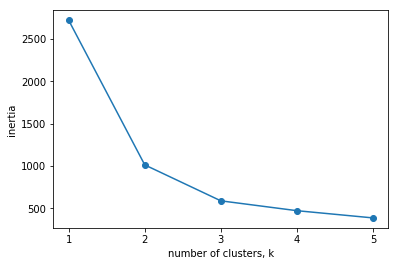

In [9]:
import matplotlib.pyplot as plt

ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


We see here that 3 is a good value for n_clusters.

## t-SNE visualization

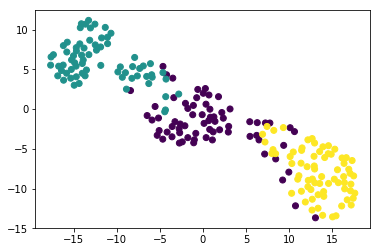

In [14]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=df_2['varieties'])
plt.show()